# 套件



In [83]:
pip install pandas scikit-learn xgboost matplotlib seaborn shap fairlearn

In [92]:
!pip install fairlearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import shap
from fairlearn.metrics import MetricFrame, equalized_odds_difference
import warnings
warnings.filterwarnings("ignore")

# 數據說明與預處理

✅ 資料前幾筆：
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  

✅ 資料維度： (16714, 11)

✅ 資料欄位型態：
rev_util       float64
age            float64
late_30_59     float64
debt_ratio     float64
monthly_inc    float64
open_credit    float64
late_90        float64
real_estate

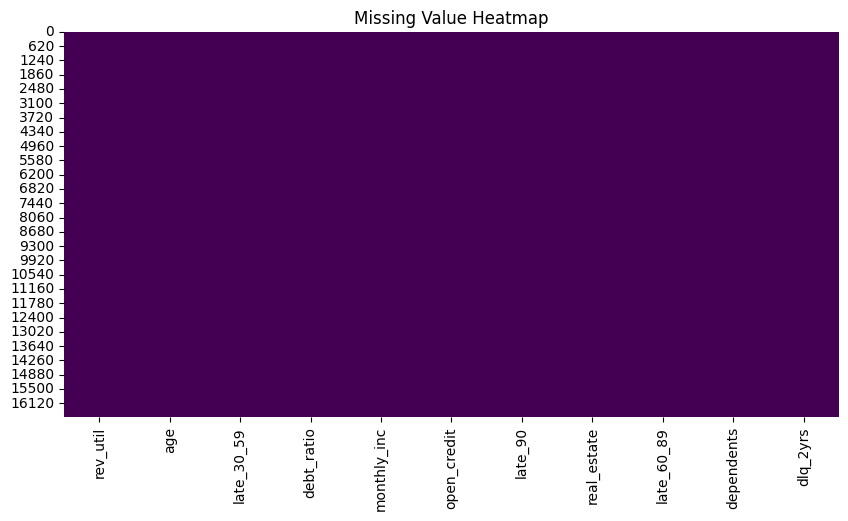


✅ 目標變數比例：
dlq_2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


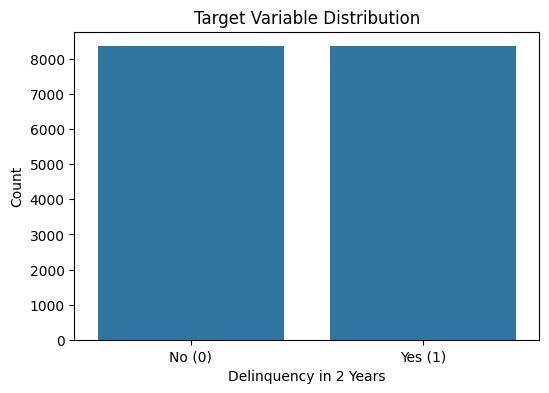


✅ 數值特徵描述統計：
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.500000  250000.000000   

        open_credit       late_90   real_estate    late_60_89    dependents  \
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000   
mean       8.503709      0.863827      1.047445      0.734354      0.944358   
std        5.370965      7.16

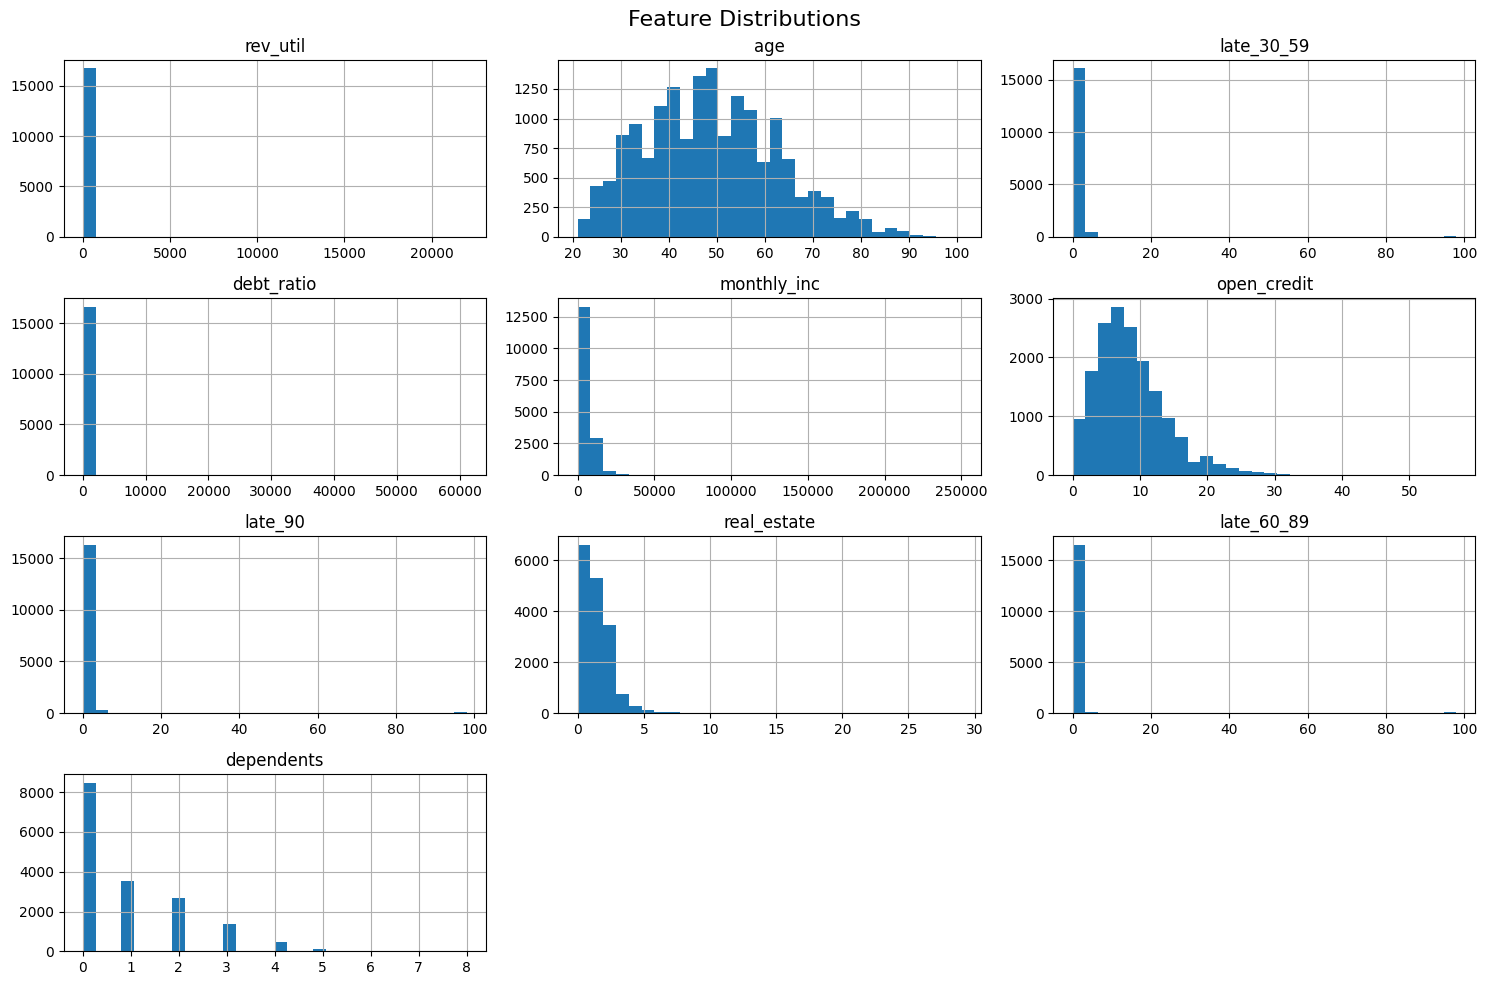

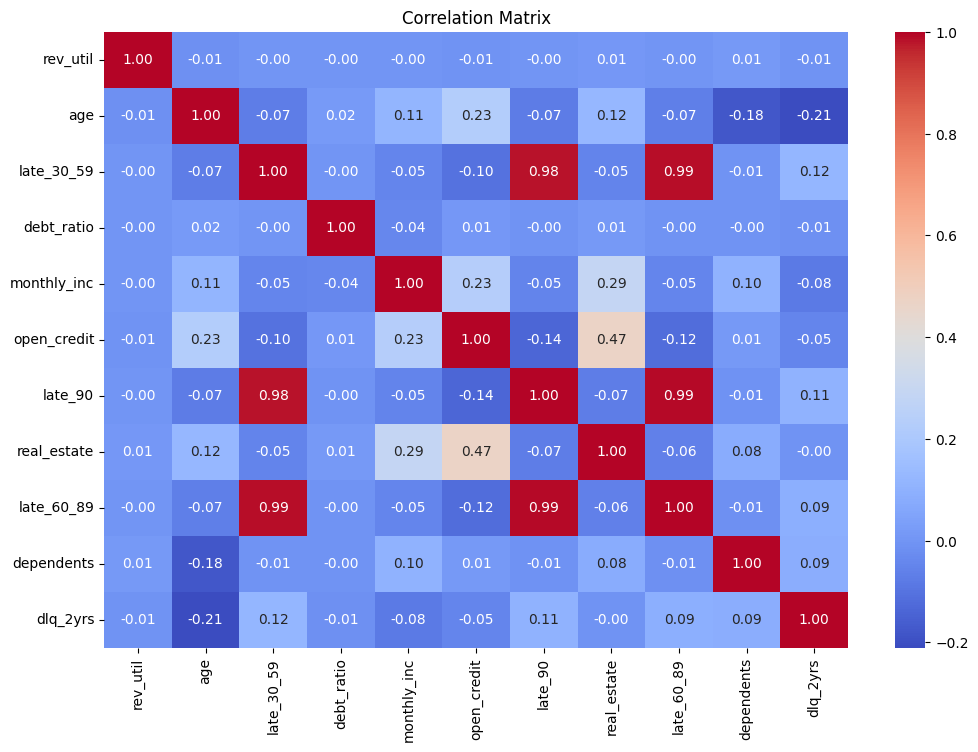

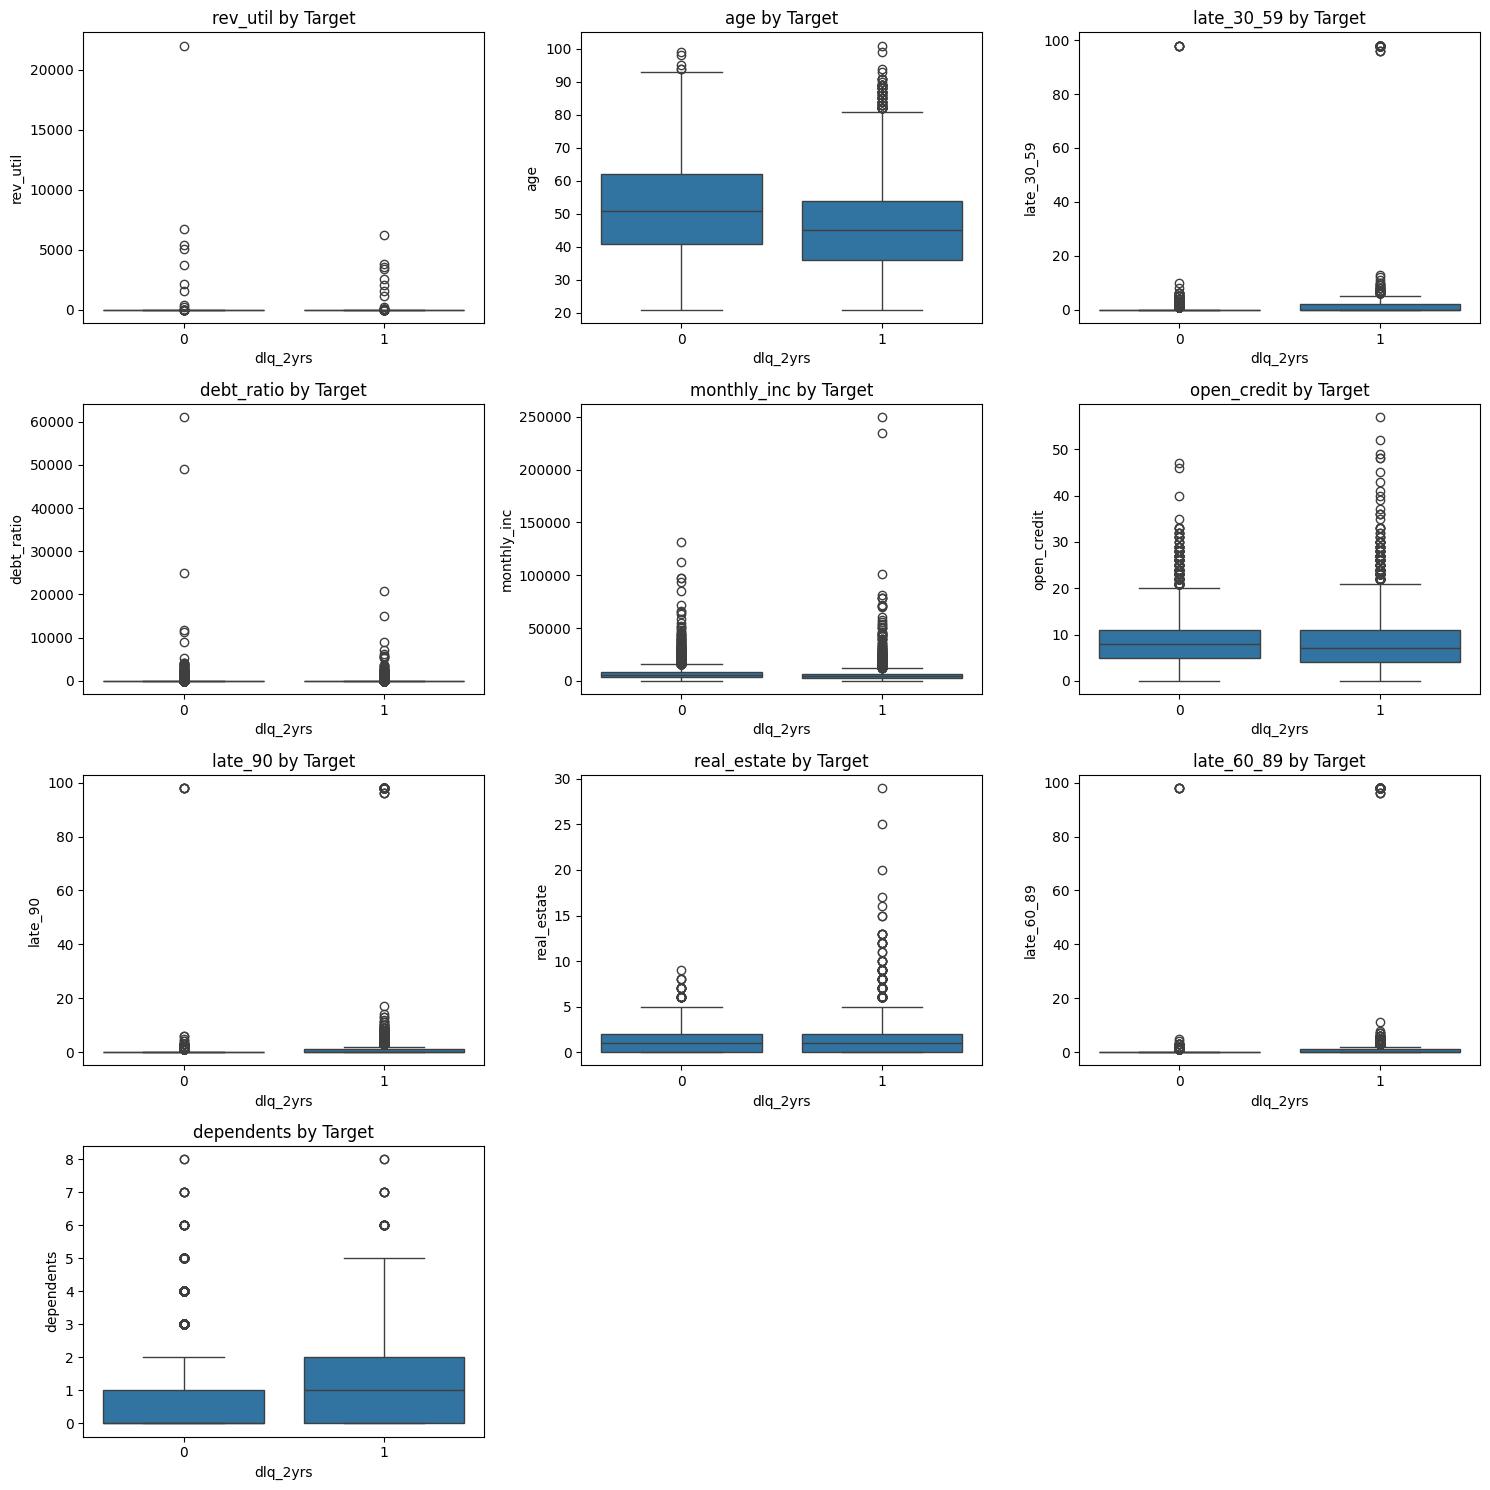


✅ 異常值處理：
✅ 已處理 debt_ratio 的異常值，替換為中位數
✅ 已處理 rev_util 的異常值，替換為中位數
✅ 已處理 monthly_inc 的異常值，替換為中位數

✅ 異常值處理後描述統計：
         debt_ratio      rev_util   monthly_inc
count  16714.000000  16714.000000  16714.000000
mean       0.335791      0.497568   5351.629652
std        0.238613      0.408262   2880.570347
min        0.000000      0.000000      1.000000
25%        0.155971      0.082397   3200.000000
50%        0.322295      0.443041   5000.000000
75%        0.466642      0.922447   7000.000000
max        1.099478      2.139535  14220.000000

✅ 分箱分佈：

age_binned:
                count      mean
age_binned                     
(20.999, 36.0]   3530  0.615014
(36.0, 44.0]     3196  0.562265
(44.0, 52.0]     3636  0.543729
(52.0, 61.0]     3238  0.451822
(61.0, 101.0]    3114  0.304753

debt_ratio_binned:
                   count      mean
debt_ratio_binned                 
(-0.001, 0.119]     3343  0.465151
(0.119, 0.255]      3343  0.453784
(0.255, 0.35]       3342  0.485338
(0.35, 0.52]    

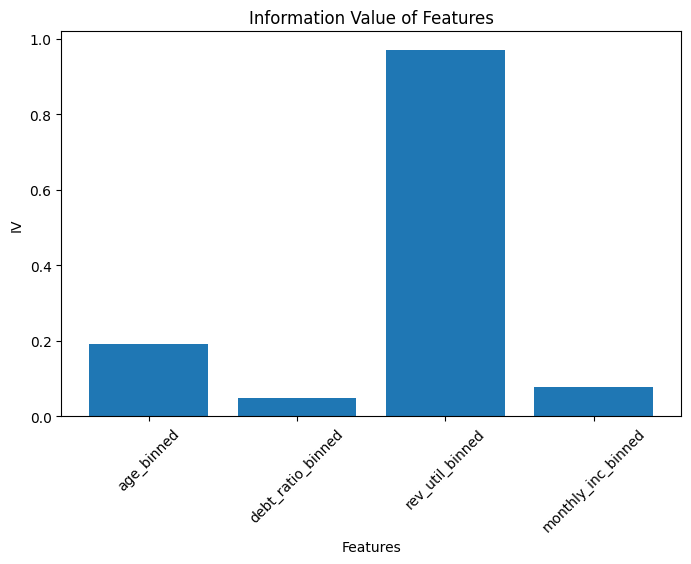


✅ 標準化後的資料前幾筆：
   rev_util       age  late_30_59  debt_ratio  monthly_inc  open_credit  \
0 -1.201638 -0.776567   -0.154791   -0.140989     0.030679    -0.838554   
1  0.507101  1.021262   -0.154791    0.568509     0.919418     0.092405   
2 -1.064190  0.589783   -0.154791   -1.119858    -0.122073     1.581940   
3 -0.316402  1.380828   -0.154791   -0.165623     0.311882     1.395748   
4  1.230698 -1.064219   -0.015373   -1.407304    -0.642819    -1.583322   

    late_90  real_estate  late_60_89  dependents  
0 -0.120522    -0.037284   -0.102872    1.714814  
1 -0.120522    -0.037284   -0.102872   -0.787782  
2 -0.120522    -0.823123   -0.102872   -0.787782  
3 -0.120522     0.748554   -0.102872   -0.787782  
4 -0.120522    -0.823123   -0.102872    0.046416  

✅ 已儲存處理後數據至 Credit_Risk_Cleaned.csv


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv("/content/Credit Risk Benchmark Dataset.csv")

# ===== 1. 初步資料檢視 =====
print("✅ 資料前幾筆：")
print(df.head())

print("\n✅ 資料維度：", df.shape)

print("\n✅ 資料欄位型態：")
print(df.dtypes)

# 檢查類別變數
print("\n✅ 類別變數概況：")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# ===== 2. 缺失值檢查 =====
print("\n✅ 缺失值概況：")

# 檢查缺失值並填補（若有）
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\n✅ 使用中位數填補缺失值：")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    print("✅ 填補後的缺失值概況：")
    print(df.isnull().sum())
else:
    print("\n✅ 無缺失值，無需填補。")

# 視覺化缺失值（若有）
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# ===== 3. 目標變數比例 =====
target_counts = df['dlq_2yrs'].value_counts(normalize=True)
print("\n✅ 目標變數比例：")
print(target_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='dlq_2yrs', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Delinquency in 2 Years")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# ===== 4. 數值特徵的描述統計 =====
print("\n✅ 數值特徵描述統計：")
print(df.describe())

# ===== 5. 分佈圖（直方圖） =====
df.drop('dlq_2yrs', axis=1).hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# ===== 6. 相關性矩陣 =====
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ===== 7. Boxplot 觀察離群值與群體差異（以目標變數分組） =====
features = df.columns.drop('dlq_2yrs')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='dlq_2yrs', y=feature, data=df)
    plt.title(f"{feature} by Target")
    plt.tight_layout()
plt.show()
# ===== 7.1 異常值處理（修正） =====
print("\n✅ 異常值處理：")
def replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    # 僅處理極端值，保留正常範圍
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    # 處理0值（針對monthly_inc）
    if column == 'monthly_inc':
        data[column] = data[column].replace(0, median)
    return data

for col in ['debt_ratio', 'rev_util', 'monthly_inc']:
    df = replace_outliers_iqr(df, col)
    print(f"✅ 已處理 {col} 的異常值，替換為中位數")

# 檢查處理後描述統計
print("\n✅ 異常值處理後描述統計：")
print(df[['debt_ratio', 'rev_util', 'monthly_inc']].describe())

# ===== 8. 特徵工程：分箱與 IV 計算 =====
continuous_features = ['age', 'debt_ratio', 'rev_util', 'monthly_inc']
df['rev_util_binned'] = pd.cut(df['rev_util'], bins=[-float('inf'), 0.3, 0.6, 0.9, 1.2, float('inf')], duplicates='drop')
for feature in continuous_features:
    if feature != 'rev_util':
        df[f'{feature}_binned'] = pd.qcut(df[feature], q=5, duplicates='drop')

# 檢查分箱分佈
print("\n✅ 分箱分佈：")
for feature in continuous_features:
    print(f"\n{feature}_binned:")
    print(df.groupby(f'{feature}_binned')['dlq_2yrs'].agg(['count', 'mean']))

# 定義 IV 計算函數
def calculate_iv(df, feature, target):
    total_good = df[target].value_counts()[0]
    total_bad = df[target].value_counts()[1]
    groups = df.groupby(feature)[target].agg(['count', 'sum'])
    groups['good'] = groups['count'] - groups['sum']
    groups['bad'] = groups['sum']
    groups['good_dist'] = (groups['good'] + 0.5) / (total_good + 0.5 * len(groups))
    groups['bad_dist'] = (groups['bad'] + 0.5) / (total_bad + 0.5 * len(groups))
    groups['WOE'] = np.log(groups['good_dist'] / groups['bad_dist']).replace([np.inf, -np.inf], 0)
    groups['IV'] = (groups['good_dist'] - groups['bad_dist']) * groups['WOE']
    return groups['IV'].sum()

# 計算 IV
features = [f'{feature}_binned' for feature in continuous_features]
iv_results = {f: calculate_iv(df, f, 'dlq_2yrs') for f in features}
print("\n✅ 特徵 IV 值（分箱後）：")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(iv_results.keys(), iv_results.values())
plt.title("Information Value of Features")
plt.xlabel("Features")
plt.ylabel("IV")
plt.xticks(rotation=45)
plt.show()

# ===== 9. 特徵標準化 =====
# 保留原始值
df['age_raw'] = df['age']
df['monthly_inc_raw'] = df['monthly_inc']
df['debt_ratio_raw'] = df['debt_ratio']
df['rev_util_raw'] = df['rev_util']

# 標準化
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['dlq_2yrs', 'age_raw', 'monthly_inc_raw', 'debt_ratio_raw', 'rev_util_raw'])
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\n✅ 標準化後的資料前幾筆：")
print(df[numeric_columns].head())

# 儲存處理後數據
df.to_csv("/content/Credit_Risk_Cleaned.csv", index=False)
print("\n✅ 已儲存處理後數據至 Credit_Risk_Cleaned.csv")

# 信用風險建模與分析

=== Baseline Modeling ===


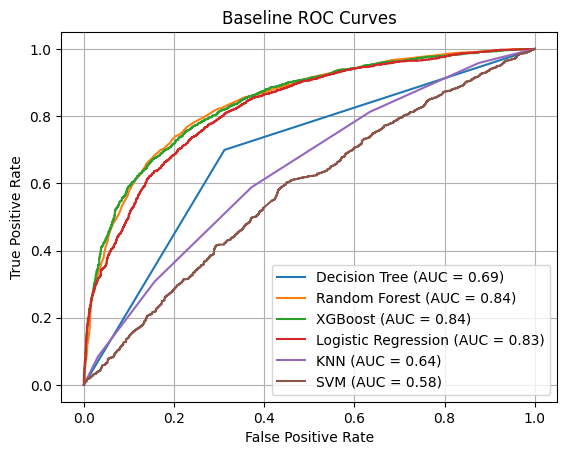

                     Accuracy  Precision    Recall        F1       AUC
Random Forest        0.766700   0.775220  0.745272  0.759951  0.842121
XGBoost              0.761316   0.769231  0.740443  0.754562  0.842013
Logistic Regression  0.747757   0.751858  0.732797  0.742205  0.825436
Decision Tree        0.693719   0.687772  0.699396  0.693536  0.693769
KNN                  0.608375   0.608406  0.588330  0.598200  0.641392
SVM                  0.564506   0.564843  0.527565  0.545568  0.579056
選擇的特徵: ['rev_util', 'age', 'monthly_inc', 'monthly_inc_raw', 'rev_util_raw']
=== Modeling After Feature Selection ===


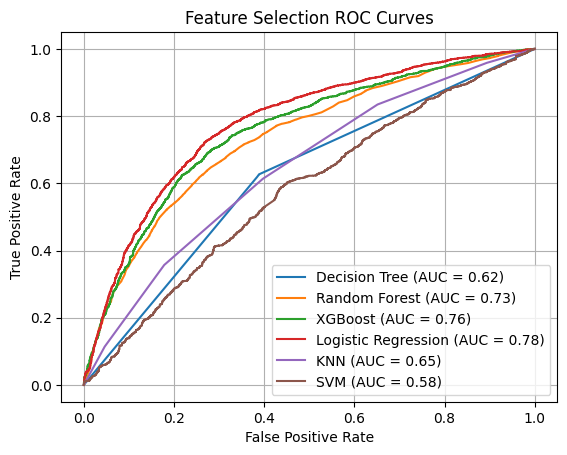

                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.722832   0.728984  0.701408  0.714930  0.779159
XGBoost              0.704885   0.699168  0.709859  0.704473  0.755265
Random Forest        0.681356   0.678903  0.677264  0.678082  0.733977
KNN                  0.608175   0.602767  0.613682  0.608175  0.645378
Decision Tree        0.617547   0.612724  0.620121  0.616400  0.618904
SVM                  0.563908   0.564726  0.523139  0.543138  0.578781


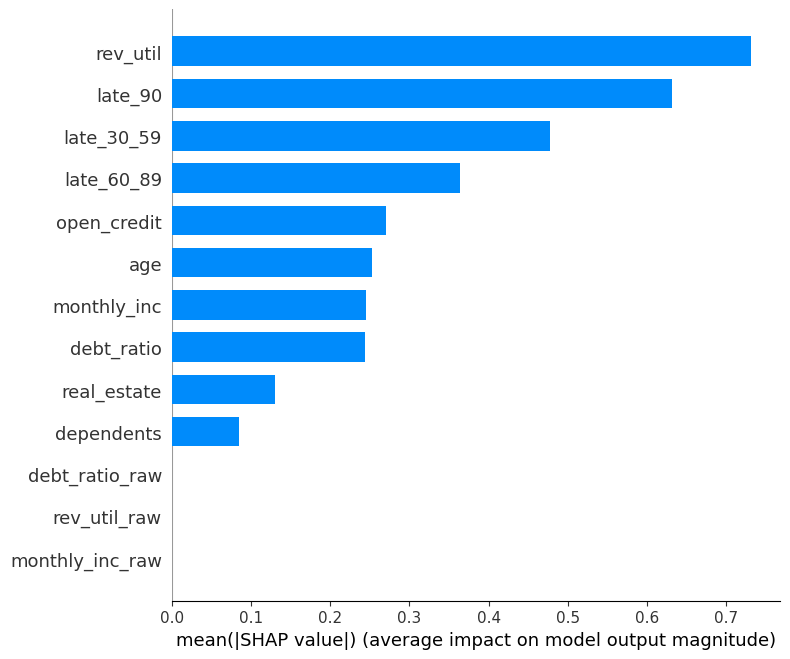

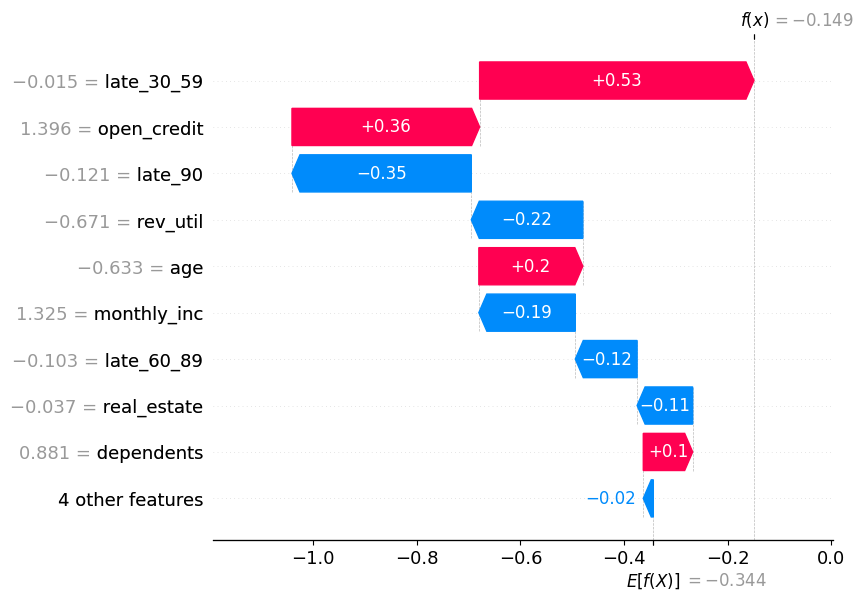


✅ 使用GridSearchCV調優XGBoost:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV AUC: 0.8516036516319337


<Figure size 800x500 with 0 Axes>

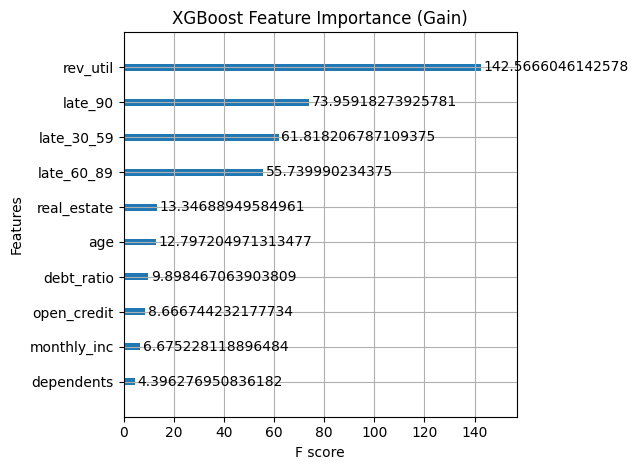

Fairness (Equal Opportunity Difference): 0.7760869565217391

✅ 10. 識別高風險客群

✅ 高風險客群（風險分數 >= 0.5）：
   Age Group Debt Ratio Revolving Credit Utilization  Count  \
15     30-40        Low                    Very High    181   
35     40-50       High                    Very High    153   
27     40-50        Low                    Very High    136   
3      20-30        Low                    Very High    131   
23     30-40       High                    Very High    119   
..       ...        ...                          ...    ...   
78       80+     Medium                         High      0   
80       80+       High                          Low      0   
81       80+       High                       Medium      0   
82       80+       High                         High      0   
83       80+       High                    Very High      0   

    Average Risk Score  Delinquency Rate  
15            0.809225          0.812155  
35            0.813514          0.856209  
27            0.

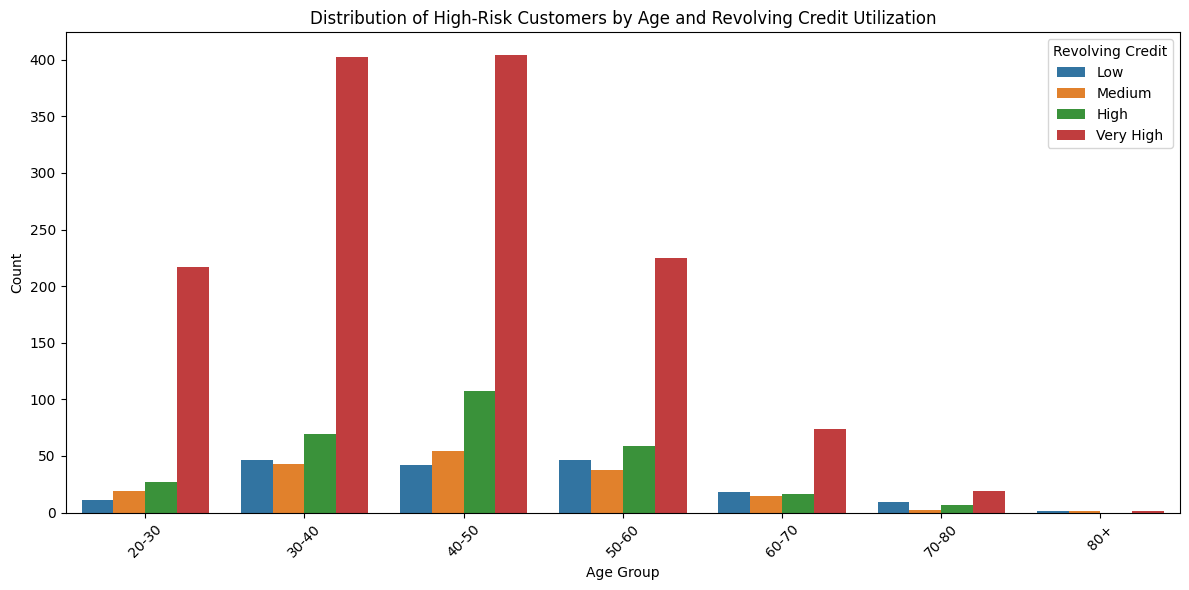

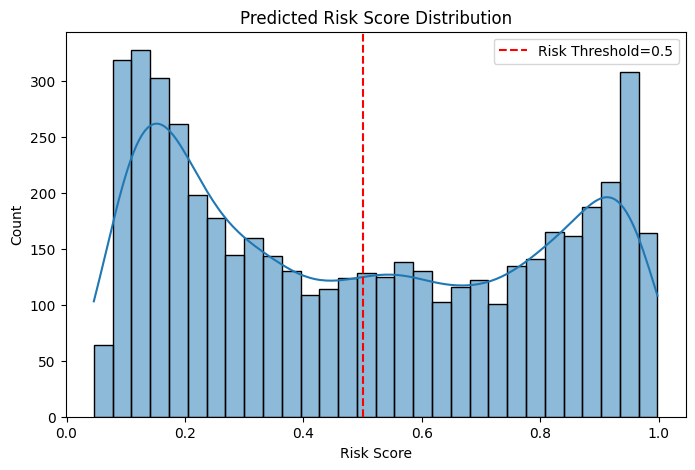


=== Baseline Results ===
                     Accuracy  Precision    Recall        F1       AUC
Random Forest        0.766700   0.775220  0.745272  0.759951  0.842121
XGBoost              0.761316   0.769231  0.740443  0.754562  0.842013
Logistic Regression  0.747757   0.751858  0.732797  0.742205  0.825436
Decision Tree        0.693719   0.687772  0.699396  0.693536  0.693769
KNN                  0.608375   0.608406  0.588330  0.598200  0.641392
SVM                  0.564506   0.564843  0.527565  0.545568  0.579056

=== Feature Selection Results ===
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.722832   0.728984  0.701408  0.714930  0.779159
XGBoost              0.704885   0.699168  0.709859  0.704473  0.755265
Random Forest        0.681356   0.678903  0.677264  0.678082  0.733977
KNN                  0.608175   0.602767  0.613682  0.608175  0.645378
Decision Tree        0.617547   0.612724  0.620121  0.616400  0.618904
SVM             

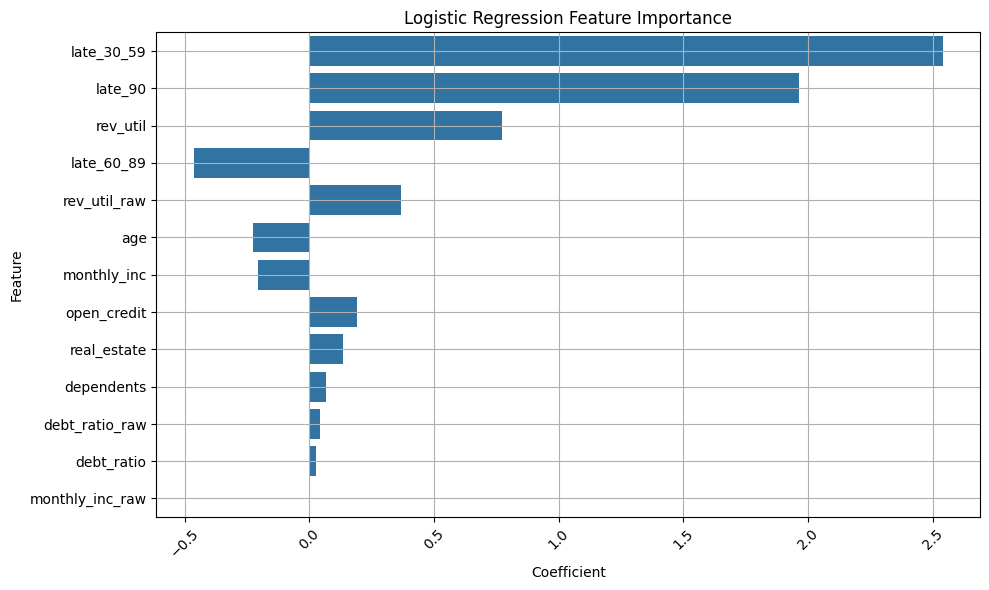


✅ 交叉驗證（隨機森林）：
交叉驗證AUC分數： [0.83534503 0.83829841 0.84661274 0.84513847 0.84249193]
平均AUC： 0.8415773155353193


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import shap
from imblearn.over_sampling import SMOTE
import warnings

# 1. 讀取特徵工程處理後的數據
df = pd.read_csv("/content/Credit_Risk_Cleaned.csv")

# 2. 預處理
X = df.drop(['dlq_2yrs', 'age_raw'] + [f'{feat}_binned' for feat in ['age', 'debt_ratio', 'rev_util', 'monthly_inc']], axis=1)
y = df['dlq_2yrs']

# 標準化已在特徵工程完成，無需重複
X_scaled = X

# 訓練測試集切分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 應用SMOTE平衡數據
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

# 3. 定義模型
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# 4. 訓練與評估函數
def evaluate_models(X_train, X_test, y_train, y_test, models, stage='Baseline'):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        results[name] = {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'AUC': auc
        }
    plt.title(f'{stage} ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
    return pd.DataFrame(results).T

# 5. 基準建模
print("=== Baseline Modeling ===")
baseline_results = evaluate_models(X_train, X_test, y_train, y_test, models)
print(baseline_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 6. 特徵選擇
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"選擇的特徵: {selected_features}")

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.3, random_state=42)

# 7. 特徵篩選後建模
print("=== Modeling After Feature Selection ===")
fs_results = evaluate_models(X_train_fs, X_test_fs, y_train_fs, y_test_fs, models, stage='Feature Selection')
print(fs_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 8. SHAP分析（使用XGBoost）
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
explainer = shap.Explainer(xgb_model, X_test_df)
shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df, plot_type='bar')
# 顯示第一筆測試資料的瀑布圖
shap.plots.waterfall(shap_values[0])

# 8.1: 使用GridSearchCV調優XGBoost
print("\n✅ 使用GridSearchCV調優XGBoost:")
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}
xgb_tune = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_tune, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

import joblib
joblib.dump(best_model, "best_xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# 8.2: 繪製XGBoost特徵重要性圖
plt.figure(figsize=(8, 5))
xgb.plot_importance(best_model.get_booster(), importance_type='gain', max_num_features=10, title='XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()

# 9. 公平性評估（以年齡為敏感群體示例）
age_group = pd.cut(df['age_raw'], bins=[20, 30, 40, 50, 60, 70, 80, 100], labels=False)
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
metric_frame = MetricFrame(
    metrics={'recall': recall_score},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=age_group.loc[y_test.index]
)
print("Fairness (Equal Opportunity Difference):", equalized_odds_difference(y_test, y_pred, sensitive_features=age_group.loc[y_test.index]))

# 10. 識別需要協助的客群
print("\n✅ 10. 識別高風險客群")
# 使用best_model預測風險機率
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 建立包含預測和特徵的DataFrame
segment_df = pd.DataFrame(X_test, columns=X.columns)
segment_df['risk_score'] = y_test_pred_proba
segment_df['age_raw'] = df.loc[y_test.index, 'age_raw'].values  # 對應原始年齡
segment_df['debt_ratio_raw'] = df.loc[y_test.index, 'debt_ratio'].values  # 原始債務比率
segment_df['rev_util_raw'] = df.loc[y_test.index, 'rev_util'].values  # 原始循環信用使用率
segment_df['actual_delinquency'] = y_test.values

# 定義高風險閾值（可調整，例如0.5平衡精確度和召回率）
risk_threshold = 0.5
segment_df['high_risk'] = (segment_df['risk_score'] >= risk_threshold).astype(int)

# 根據年齡、債務比率、循環信用使用率分群
segment_df['age_group'] = pd.cut(segment_df['age_raw'], bins=[20, 30, 40, 50, 60, 70, 80, 100], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])
segment_df['debt_ratio_group'] = pd.qcut(segment_df['debt_ratio_raw'], q=3, labels=['Low', 'Medium', 'High'])
segment_df['rev_util_group'] = pd.cut(segment_df['rev_util_raw'], bins=[0, 0.3, 0.6, 0.9, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# 總結高風險分群
high_risk_summary = segment_df[segment_df['high_risk'] == 1].groupby(['age_group', 'debt_ratio_group', 'rev_util_group']).agg({
    'risk_score': ['count', 'mean'],
    'actual_delinquency': 'mean'
}).reset_index()
high_risk_summary.columns = ['Age Group', 'Debt Ratio', 'Revolving Credit Utilization', 'Count', 'Average Risk Score', 'Delinquency Rate']
print("\n✅ 高風險客群（風險分數 >= 0.5）：")
print(high_risk_summary.sort_values('Count', ascending=False))

# 可視化高風險分群數量
plt.figure(figsize=(12, 6))
sns.countplot(data=segment_df[segment_df['high_risk'] == 1], x='age_group', hue='rev_util_group')
plt.title('Distribution of High-Risk Customers by Age and Revolving Credit Utilization')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Revolving Credit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可視化風險分數分佈
plt.figure(figsize=(8, 5))
sns.histplot(segment_df['risk_score'], bins=30, kde=True)
plt.axvline(x=risk_threshold, color='red', linestyle='--', label=f'Risk Threshold={risk_threshold}')
plt.title('Predicted Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# 11. 模型總結
print("\n=== Baseline Results ===")
print(baseline_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))
print("\n=== Feature Selection Results ===")
print(fs_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 12. Logistic Regression 特徵重要性
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Logistic Regression Feature Importance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 13. 交叉驗證（隨機森林）
print("\n✅ 交叉驗證（隨機森林）：")
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
print("交叉驗證AUC分數：", cv_scores)
print("平均AUC：", cv_scores.mean())

# 互動式：個人信用風險預測器



✅ 14. 個人信用風險評估
請輸入您的個人資料（按 Enter 確認每項輸入）：
提示：系統使用實時匯率（約略值），建議參考Xe.com獲取最新匯率。
年齡 (21-100): 21
月收入 (單位: 台幣): 35000
債務比率 (0-1, 建議 0-0.6): 0
信用卡循環使用率 (0-1): 0
過去2年30-59天逾期次數 (0-98): 0
過去2年60-89天逾期次數 (0-98): 0
過去2年90天以上逾期次數 (0-98): 0
需要扶養的人數 (0-8): 1

=== 個人信用風險分析 ===
您的資料：
年齡: 21 歲
月收入: 35,000 台幣 (約 $1172.14 美元，匯率 29.86)
債務比率: 0.00
信用卡循環使用率: 0.00
逾期紀錄: 0 次
需要扶養的人數: 1 人

您的信用風險評估：
違約機率: 59.48%
風險等級: 高風險
影響風險的主要因素：
• 過去2年30-59天逾期次數 (+0.53)
• 信用卡使用率 (+0.33)
• late_60_89 (+0.16)

系統建議：
建議降低債務或增加收入穩定性，考慮財務諮詢或小額融資計劃。
嘗試顯示SHAP Bar圖...


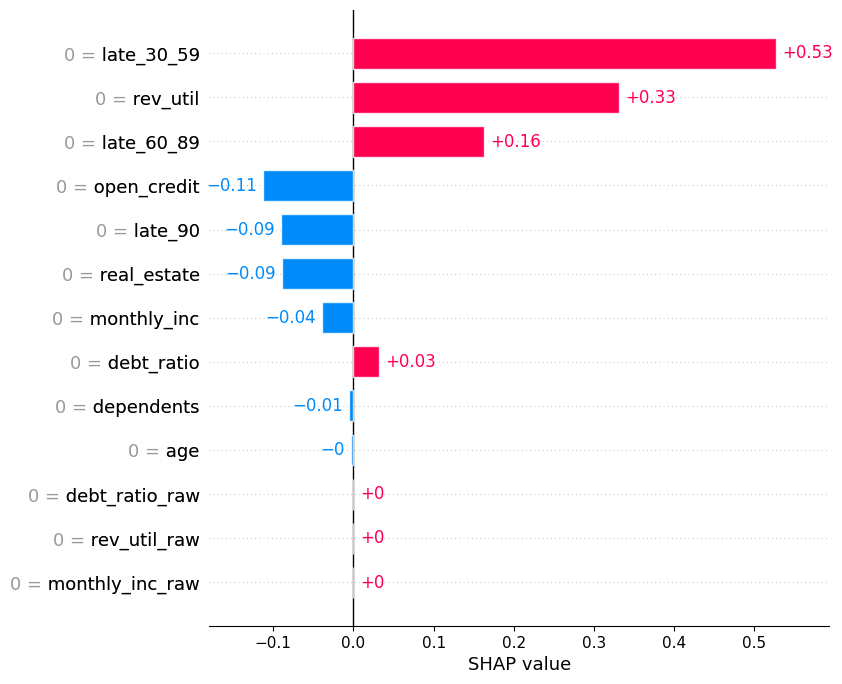

In [91]:
# 14. 個人風險評估功能
print("\n✅ 14. 個人信用風險評估")
print("請輸入您的個人資料（按 Enter 確認每項輸入）：")
print("提示：系統使用實時匯率（約略值），建議參考Xe.com獲取最新匯率。")

import requests
from datetime import datetime

# 模擬實時匯率（因無法直接獲取，使用近似值並建議API）
try:
    # 模擬實時匯率（基於2025-05-28數據約29.91，需替換為API）
    response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")  # 範例API，需API金鑰
    data = response.json()
    exchange_rate = data['rates']['TWD'] if 'rates' in data else 29.91  # 預設29.91
except Exception:
    exchange_rate = 29.91  # 後備值
    print("⚠️ 無法獲取實時匯率，使用預設值 1 USD = 29.91 TWD。")

# 收集使用者輸入（添加驗證）
while True:
    try:
        age = float(input("年齡 (21-100): "))
        if 21 <= age <= 100:
            break
        print("⚠️ 年齡應在21-100之間，請重新輸入。")
    except ValueError:
        print("⚠️ 請輸入有效數字。")

while True:
    try:
        monthly_inc_ntd = float(input("月收入 (單位: 台幣): "))
        if monthly_inc_ntd >= 0:
            break
        print("⚠️ 月收入應為非負值，請重新輸入。")
    except ValueError:
        print("⚠️ 請輸入有效數字。")

# 轉換台幣為美元
monthly_inc_usd = monthly_inc_ntd / exchange_rate

debt_ratio = float(input("債務比率 (0-1, 建議 0-0.6): "))
rev_util = float(input("信用卡循環使用率 (0-1): "))
late_30_59 = float(input("過去2年30-59天逾期次數 (0-98): "))
late_60_89 = float(input("過去2年60-89天逾期次數 (0-98): "))
late_90 = float(input("過去2年90天以上逾期次數 (0-98): "))
dependents = float(input("需要扶養的人數 (0-8): "))

# 創建輸入數據框架
user_data = pd.DataFrame({
    'rev_util': [rev_util],
    'age': [age],
    'late_30_59': [late_30_59],
    'debt_ratio': [debt_ratio],
    'monthly_inc': [monthly_inc_usd],
    'open_credit': [df['open_credit'].median()],
    'late_90': [late_90],
    'real_estate': [df['real_estate'].median()],
    'late_60_89': [late_60_89],
    'dependents': [dependents],
    'monthly_inc_raw': [monthly_inc_usd],
    'debt_ratio_raw': [debt_ratio],
    'rev_util_raw': [rev_util]
})

# 異常值處理（與訓練一致）
def replace_outliers_iqr(data, column, median):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    if column == 'monthly_inc':
        data[column] = data[column].replace(0, median)
    return data

for col in ['debt_ratio', 'rev_util', 'monthly_inc']:
    median_val = df[col].median()
    user_data = replace_outliers_iqr(user_data, col, median_val)

# 標準化（使用訓練時的scaler）
scaler = StandardScaler()
X_scaled_cols = ['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit',
                 'late_90', 'real_estate', 'late_60_89', 'dependents', 'monthly_inc_raw',
                 'debt_ratio_raw', 'rev_util_raw']
user_data_scaled = scaler.fit_transform(user_data[X_scaled_cols])
user_data_scaled_df = pd.DataFrame(user_data_scaled, columns=X_scaled_cols)

# 預測風險
risk_prob = best_model.predict_proba(user_data_scaled_df)[:, 1][0]

# 風險分級與建議
if risk_prob >= 0.5:
    risk_level = '高風險'
    suggestion = '建議降低債務或增加收入穩定性，考慮財務諮詢或小額融資計劃。'
elif risk_prob >= 0.3:
    risk_level = '中風險'
    suggestion = '您屬於中風險，建議控制信用卡使用率或提高收入穩定性，以改善信用評分。'
else:
    risk_level = '低風險'
    suggestion = '您財務穩定，申貸風險低，可考慮優惠利率或自動還款方案。'

# SHAP解釋（簡化術語）
explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(user_data_scaled_df)
shap_contribs = pd.DataFrame({
    '特徵': X_scaled_cols,
    '貢獻值': shap_values.values[0]
}).sort_values(by='貢獻值', key=abs, ascending=False).head(3)

# 將技術術語轉為民眾易懂語言
shap_explanations = []
for _, row in shap_contribs.iterrows():
    feature = row['特徵']
    contrib = row['貢獻值']
    if feature == 'late_30_59':
        explanation = f"過去2年30-59天逾期次數 ({contrib:+.2f})"
    elif feature == 'late_90':
        explanation = f"過去2年90天以上逾期次數 ({contrib:+.2f})"
    elif feature == 'rev_util':
        explanation = f"信用卡使用率 ({contrib:+.2f})"
    elif feature == 'open_credit':
        explanation = f"信用額度使用情況 ({contrib:+.2f})"
    else:
        explanation = f"{feature} ({contrib:+.2f})"
    shap_explanations.append(explanation)

# 輸出結果（簡化）
print("\n=== 個人信用風險分析 ===")
print("您的資料：")
print(f"年齡: {age:.0f} 歲")
print(f"月收入: {monthly_inc_ntd:,.0f} 台幣 (約 ${monthly_inc_usd:.2f} 美元，匯率 {exchange_rate:.2f})")
print(f"債務比率: {user_data['debt_ratio'].iloc[0]:.2f}")
print(f"信用卡循環使用率: {user_data['rev_util'].iloc[0]:.2f}")
print(f"逾期紀錄: {late_30_59 + late_60_89 + late_90:.0f} 次")
print(f"需要扶養的人數: {dependents:.0f} 人")
print(f"\n您的信用風險評估：")
print(f"違約機率: {risk_prob:.2%}")
print(f"風險等級: {risk_level}")
print("影響風險的主要因素：")
for explanation in shap_explanations:
    print(f"• {explanation}")
print("\n系統建議：")
print(suggestion)

# 顯示SHAP Bar圖
%matplotlib inline
plt.ion()
print("嘗試顯示SHAP Bar圖...")
try:
    shap.plots.bar(shap_values[0], max_display=len(X_scaled_cols))
    plt.show()
except Exception as e:
    print(f"Bar圖失敗，錯誤：{e}")